In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
 
from sklearn.metrics import r2_score


In [2]:
# Load the dataset
data = pd.read_csv('50_startups.csv')

In [3]:
# Encode categorical variable 'State' using one-hot encoding
data = pd.get_dummies(data, columns=['State'], drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop('Profit', axis=1)
y = data['Profit']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 1: Multicollinearity Analysis (VIF)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Multicollinearity (VIF):")
print(vif)

Multicollinearity (VIF):
          Features       VIF
0        R&D Spend  8.451019
1   Administration  4.950277
2  Marketing Spend  8.092278
3    State_Florida  2.004519
4   State_New York  1.928836


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


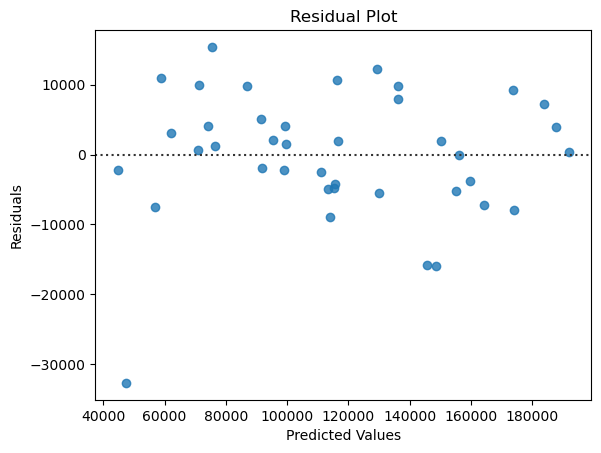

In [6]:
# Step 2: Residual Analysis
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const).fit()
residuals = model.resid

# Residual plot
sns.residplot(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


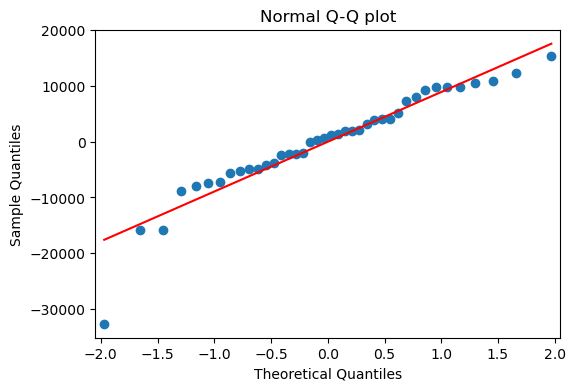

In [7]:

# Q-Q plot for normality
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("Normal Q-Q plot")
plt.show()


In [8]:
# Step 3: Cook's Distance and Leverage Cutoff
influence = model.get_influence()
cook_distance = influence.cooks_distance[0]

# Set a threshold for Cook's distance
cook_threshold = 4 / len(X_train)

# Identify influential data points
influential_points = np.where(cook_distance > cook_threshold)[0]

# Calculate leverage values
leverage = influence.hat_matrix_diag

# Set a threshold for leverage values (commonly 2 * (p + 1) / n)
leverage_threshold = 2 * (X_train.shape[1] + 1) / len(X_train)

# Identify data points with high leverage
high_leverage_points = np.where(leverage > leverage_threshold)[0]

# Combine influential and high-leverage points
outliers = np.union1d(influential_points, high_leverage_points)

# Remove influential and high-leverage data points
X_train_cleaned = X_train.drop(index=outliers)
y_train_cleaned = y_train.drop(index=outliers)

In [9]:
# Step 4: Build the Final Model
X_train_cleaned_with_const = sm.add_constant(X_train_cleaned)
final_model = sm.OLS(y_train_cleaned, X_train_cleaned_with_const).fit()

# Step 5: Calculate R-squared for the Final Model
X_test_with_const = sm.add_constant(X_test)
y_pred = final_model.predict(X_test_with_const)
final_r2 = r2_score(y_test, y_pred)

print("R-squared for the final model:", final_r2)


R-squared for the final model: 0.8990297387256097


In [12]:
###decision tree
model = DecisionTreeRegressor(random_state=0)  # Build a Decision Tree Regressor model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Predict on the test set

r2 = r2_score(y_test, y_pred) # Calculate R-squared value for the Decision Tree Regressor model


results = results.append({'Model': 'Decision Tree Regression', 'R-squared': r2}, ignore_index=True) # Append the results to the DataFrame

r2 = r2_score(y_test, y_pred)  # Calculate R-squared value
print(f'R-squared value: {r2:.4f}')

# Print the table of results
print("\nTable of R-squared values:")
print(results)


R-squared value: 0.9610

Table of R-squared values:
                      Model  R-squared
0  Decision Tree Regression   0.960979
1  Decision Tree Regression   0.960979


C:\Users\India\AppData\Local\Temp\ipykernel_12744\3690918407.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Decision Tree Regression', 'R-squared': r2}, ignore_index=True) # Append the results to the DataFrame
